# Classification Workshop

In [1]:
# Installing Libraries
!pip install sweetviz # an EDA library
!pip install shap # a model interpretation library
!pip install unrar # a data decompression library

     |████████████████████████████████| 15.1 MB 8.7 MB/s 
     |████████████████████████████████| 564 kB 9.3 MB/s 


## Obtaining the data and displaying it

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
!wget "https://github.com/univai-ghf/ghfmedia/raw/main/data/Classification/prep_file.rar"
!wget "https://github.com/univai-ghf/ghfmedia/raw/main/data/Classification/num_cols.csv"
!wget "https://github.com/univai-ghf/ghfmedia/raw/main/data/Classification/str_cols.csv"

--2022-04-02 01:45:27--  https://github.com/univai-ghf/ghfmedia/raw/main/data/Classification/prep_file.rar
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/Classification/prep_file.rar [following]
--2022-04-02 01:45:27--  https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/Classification/prep_file.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 954088 (932K) [application/octet-stream]
Saving to: ‘prep_file.rar’

prep_file.rar       100%[===================>] 931.73K  --.-KB/s    in 0.03s   

2022-04-02 01:45:27 (35.6 MB/s) - ‘prep_file.rar’ saved 

In [4]:
!unrar x './prep_file.rar'  './'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ./prep_file.rar

Extracting  ./prep_file.csv                                                3%  6% 10% 13% 17% 20% 24% 27% 30% 34% 37% 41% 44% 48% 51% 54% 58% 61% 65% 68% 72% 75% 78% 82% 85% 89% 92% 96% 99%  OK 
All OK


In [5]:
!ls

num_cols.csv  prep_file.csv  prep_file.rar  sample_data  str_cols.csv


In [6]:
t1 = pd.read_csv("prep_file.csv",sep=",")

## Step 1-  Look at the data

In [7]:
t1.head()

,Unnamed: 0,income,age,experience,bureau_score,married,house_ownership,car_ownership,risk_flag,profession,city,state,current_job_years,current_house_years,device
0,19607,2514921,31.00000,4.00000,651.00000,single,rented,no,0,Psychologist,Chandrapur,Maharashtra,4.00000,14.00000,Oppo
1,75516,7047674,28.00000,4.00000,526.00000,single,rented,yes,0,Economist,Ramagundam[27],Telangana,3.00000,13.00000,Xiaomi
2,63804,2749317,30.00000,2.00000,526.00000,single,rented,no,0,Secretary,Ramagundam[27],Telangana,2.00000,14.00000,samsung
3,63676,7378274,24.00000,0.00000,764.00000,single,rented,no,0,Flight attendant,Adoni,Andhra Pradesh,0.00000,11.00000,samsung
4,50914,9574585,27.00000,5.00000,739.00000,single,rented,yes,0,Technician,Imphal,Manipur,5.00000,10.00000,Vivo


In [8]:
t1.dtypes

Unnamed: 0               int64
income                   int64
age                    float64
experience             float64
bureau_score           float64
married                 object
house_ownership         object
car_ownership           object
risk_flag                int64
profession              object
city                    object
state                   object
current_job_years      float64
current_house_years    float64
device                  object
dtype: object

### Target variable distribution

In [9]:
t1["risk_flag"].value_counts()

0    236567
1     43433
Name: risk_flag, dtype: int64

In [10]:
t1["risk_flag"].value_counts(normalize=True)

0   0.84488
1   0.15512
Name: risk_flag, dtype: float64

### Listing string and numeric columns

In [11]:
str_col_name_df = pd.read_csv("str_cols.csv")
str_col_name_df

,Unnamed: 0,0
0,0,profession
1,1,married
2,2,house_ownership
3,3,car_ownership
4,4,city
5,5,state


In [12]:
str_col_name_df.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [13]:
str_col_name_list = list(str_col_name_df['0'])
str_col_name_list = str_col_name_list + ['device']
str_col_name_list

['profession',
 'married',
 'house_ownership',
 'car_ownership',
 'city',
 'state',
 'device']

In [14]:
num_col_name_df = pd.read_csv("num_cols.csv")


In [15]:
num_col_name_list = list(num_col_name_df["0"])
num_col_name_list

['income',
 'age',
 'experience',
 'current_job_years',
 'current_house_years',
 'bureau_score']

In [16]:
print (str_col_name_list)
print (num_col_name_list)

['profession', 'married', 'house_ownership', 'car_ownership', 'city', 'state', 'device']
['income', 'age', 'experience', 'current_job_years', 'current_house_years', 'bureau_score']


In [17]:
t1.state.unique()

array(['Maharashtra', 'Telangana', 'Andhra Pradesh', 'Manipur',
       'Uttar Pradesh', 'Gujarat', 'Jharkhand', 'Assam', 'Madhya Pradesh',
       'Tamil Nadu', 'Karnataka', 'West Bengal', 'Bihar', 'Haryana',
       'Punjab', 'Kerala', 'Rajasthan', 'Delhi', 'Chhattisgarh',
       'Uttar Pradesh[5]', 'Sikkim', 'Odisha', 'Puducherry',
       'Jammu and Kashmir', 'Mizoram', 'Uttarakhand', 'Himachal Pradesh',
       'Chandigarh', 'Tripura'], dtype=object)

In [18]:
list(t1.city.unique())

['Chandrapur',
 'Ramagundam[27]',
 'Adoni',
 'Imphal',
 'Jaunpur',
 'Bhusawal',
 'Sambhal',
 'Morbi',
 'Giridih',
 'Ongole',
 'Silchar',
 'Indore',
 'Aligarh',
 'Srikakulam',
 'Phusro',
 'Tinsukia',
 'Salem',
 'Davanagere',
 'Bhiwandi',
 'Orai',
 'Raebareli',
 'Coimbatore',
 'Ranchi',
 'Tirupati[21][22]',
 'Uluberia',
 'Saharsa[29]',
 'Motihari[34]',
 'Katni',
 'Ambarnath',
 'Anantapur',
 'Bongaigaon',
 'Sonipat',
 'Satna',
 'Deoghar',
 'Karnal',
 'Tumkur',
 'Phagwara',
 'Khora, Ghaziabad',
 'Kozhikode',
 'Siliguri',
 'Proddatur',
 'Guwahati',
 'Chapra',
 'Amaravati',
 'Gurgaon',
 'Gulbarga',
 'Fatehpur',
 'Danapur',
 'Serampore',
 'Dibrugarh',
 'Khammam',
 'Mangalore',
 'Navi Mumbai',
 'Parbhani',
 'Nizamabad',
 'Tadipatri',
 'Raiganj',
 'Jorhat',
 'Sikar',
 'Madhyamgram',
 'Jalna',
 'Kochi',
 'Yamunanagar',
 'Loni',
 'Visakhapatnam[4]',
 'Naihati',
 'New Delhi',
 'Guntur[13]',
 'Darbhanga',
 'Bettiah[33]',
 'Mira-Bhayandar',
 'Purnia[26]',
 'Hospet',
 'Raipur',
 'Tiruppur',
 'Bikaner

In [19]:
t0 = t1.copy()
for i in str_col_name_list:
    t1[i] = t1[i].str.lower().str.lstrip().str.rstrip()
    t1[i] = t1[i].str.replace("[^a-z\s]+","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [20]:
list(t1.city.unique())

['chandrapur',
 'ramagundam',
 'adoni',
 'imphal',
 'jaunpur',
 'bhusawal',
 'sambhal',
 'morbi',
 'giridih',
 'ongole',
 'silchar',
 'indore',
 'aligarh',
 'srikakulam',
 'phusro',
 'tinsukia',
 'salem',
 'davanagere',
 'bhiwandi',
 'orai',
 'raebareli',
 'coimbatore',
 'ranchi',
 'tirupati',
 'uluberia',
 'saharsa',
 'motihari',
 'katni',
 'ambarnath',
 'anantapur',
 'bongaigaon',
 'sonipat',
 'satna',
 'deoghar',
 'karnal',
 'tumkur',
 'phagwara',
 'khora ghaziabad',
 'kozhikode',
 'siliguri',
 'proddatur',
 'guwahati',
 'chapra',
 'amaravati',
 'gurgaon',
 'gulbarga',
 'fatehpur',
 'danapur',
 'serampore',
 'dibrugarh',
 'khammam',
 'mangalore',
 'navi mumbai',
 'parbhani',
 'nizamabad',
 'tadipatri',
 'raiganj',
 'jorhat',
 'sikar',
 'madhyamgram',
 'jalna',
 'kochi',
 'yamunanagar',
 'loni',
 'visakhapatnam',
 'naihati',
 'new delhi',
 'guntur',
 'darbhanga',
 'bettiah',
 'mirabhayandar',
 'purnia',
 'hospet',
 'raipur',
 'tiruppur',
 'bikaner',
 'allahabad',
 'madanapalle',
 'va

In [21]:
t1.head()

,Unnamed: 0,income,age,experience,bureau_score,married,house_ownership,car_ownership,risk_flag,profession,city,state,current_job_years,current_house_years,device
0,19607,2514921,31.00000,4.00000,651.00000,single,rented,no,0,psychologist,chandrapur,maharashtra,4.00000,14.00000,oppo
1,75516,7047674,28.00000,4.00000,526.00000,single,rented,yes,0,economist,ramagundam,telangana,3.00000,13.00000,xiaomi
2,63804,2749317,30.00000,2.00000,526.00000,single,rented,no,0,secretary,ramagundam,telangana,2.00000,14.00000,samsung
3,63676,7378274,24.00000,0.00000,764.00000,single,rented,no,0,flight attendant,adoni,andhra pradesh,0.00000,11.00000,samsung
4,50914,9574585,27.00000,5.00000,739.00000,single,rented,yes,0,technician,imphal,manipur,5.00000,10.00000,vivo


In [35]:
####Back to Slide

## Step 2: Train test split

Before we do any preprocessing we want to keep train and test seperate. Why?

In [22]:
from sklearn.model_selection import train_test_split
t1_train, t1_test = train_test_split(t1[str_col_name_list+num_col_name_list + ['risk_flag']], test_size=0.33, random_state=42)

In [23]:
t1_train.head()

,profession,married,house_ownership,car_ownership,city,state,device,income,age,experience,current_job_years,current_house_years,bureau_score,risk_flag
160401,financial analyst,single,rented,no,fatehpur,uttar pradesh,samsung,7175181,27.00000,3.00000,3.00000,10.00000,850.00000,0
148161,chef,single,rented,no,ozhukarai,puducherry,iqoo,7601827,30.00000,5.00000,5.00000,12.00000,690.00000,0
76224,scientist,single,rented,no,jamalpur,bihar,vivo,9483434,26.00000,2.00000,2.00000,14.00000,662.00000,0
198362,design engineer,single,rented,no,bhopal,madhya pradesh,xiaomi,3211177,30.00000,3.00000,3.00000,10.00000,624.00000,0
119380,technical writer,married,owned,yes,ambarnath,maharashtra,samsung,8211851,25.00000,2.00000,2.00000,10.00000,577.00000,0


In [64]:
t1_train = t1_train.reset_index().drop('index', axis=1)
t1_test = t1_test.reset_index().drop('index', axis=1)

In [65]:
t1_train.head()

,profession,married,house_ownership,car_ownership,city,state,device,income,age,experience,current_job_years,current_house_years,bureau_score,risk_flag
0,financial analyst,single,rented,no,fatehpur,uttar pradesh,samsung,7175181,27.00000,3.00000,3.00000,10.00000,850.00000,0
1,chef,single,rented,no,ozhukarai,puducherry,iqoo,7601827,30.00000,5.00000,5.00000,12.00000,690.00000,0
2,scientist,single,rented,no,jamalpur,bihar,vivo,9483434,26.00000,2.00000,2.00000,14.00000,662.00000,0
3,design engineer,single,rented,no,bhopal,madhya pradesh,xiaomi,3211177,30.00000,3.00000,3.00000,10.00000,624.00000,0
4,technical writer,married,owned,yes,ambarnath,maharashtra,samsung,8211851,25.00000,2.00000,2.00000,10.00000,577.00000,0


In [66]:
t1_train.shape, t1_test.shape

((187600, 14), (92400, 14))

## Step 3: EDA

In [67]:
import sweetviz as sv

In [68]:
sweet_report = sv.analyze([t1_train,"full_data"],target_feat="risk_flag")

                                             |          | [  0%]   00:00 -> (? left)


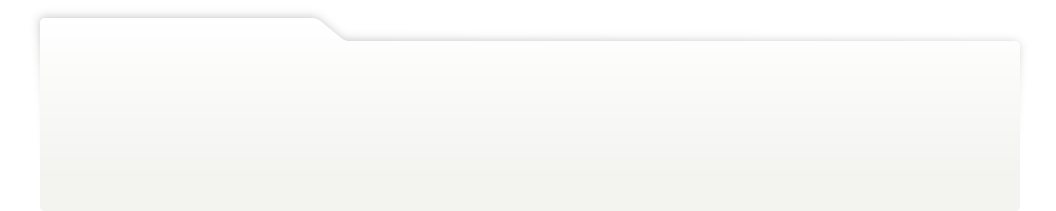
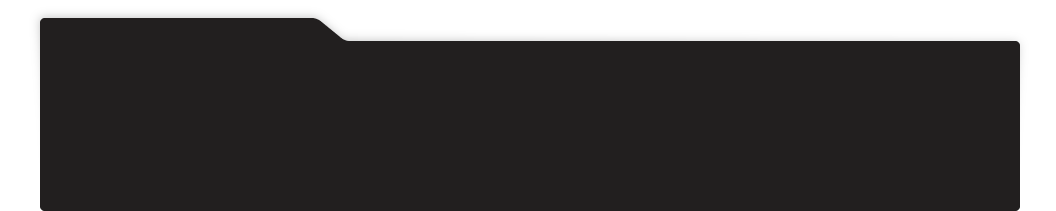
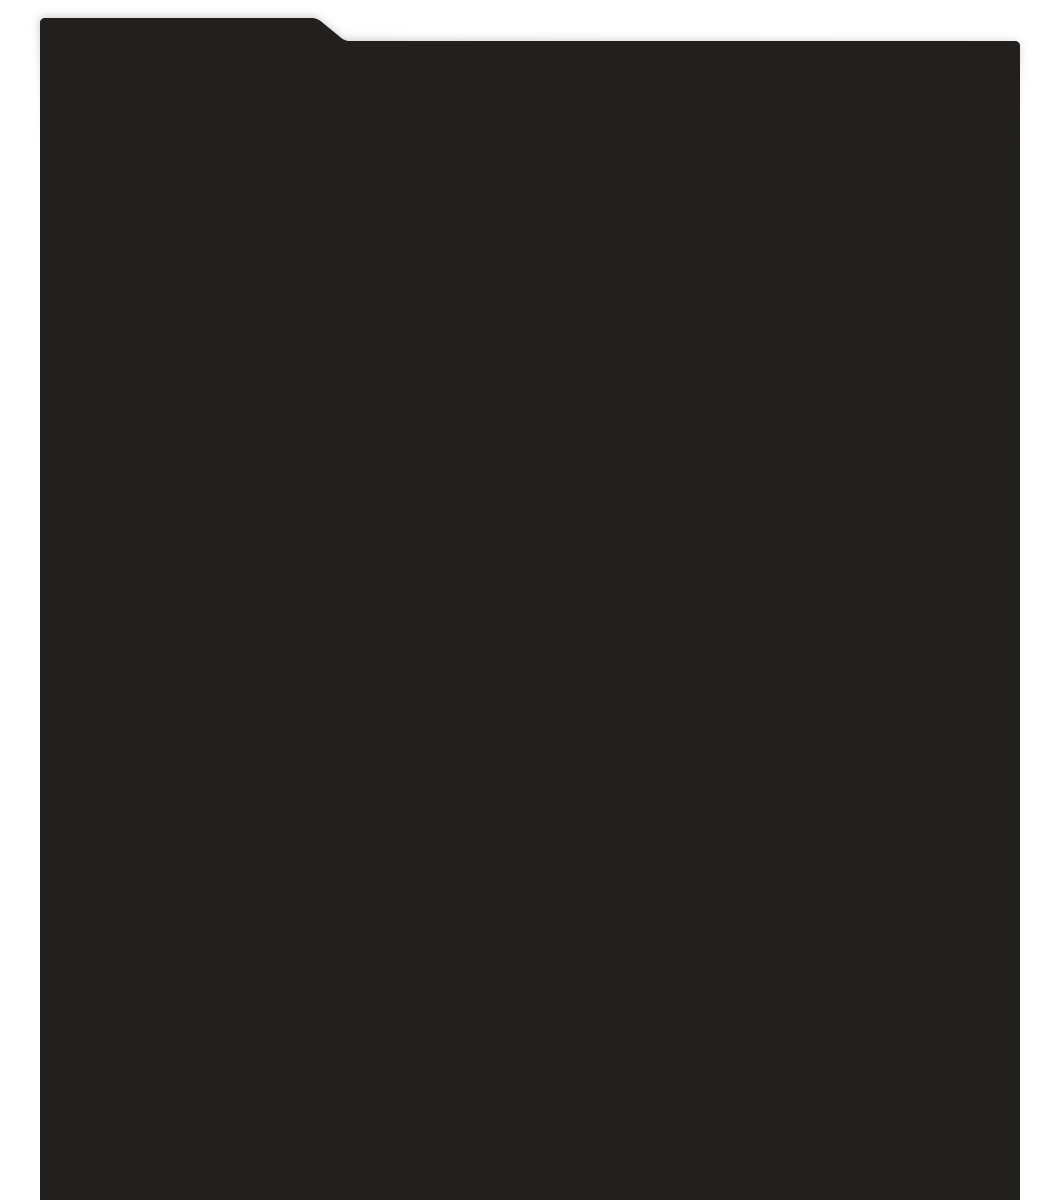
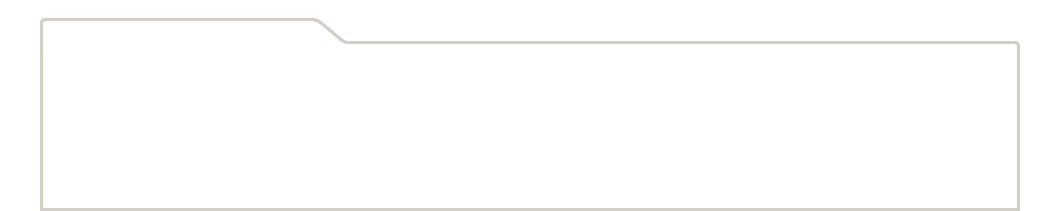
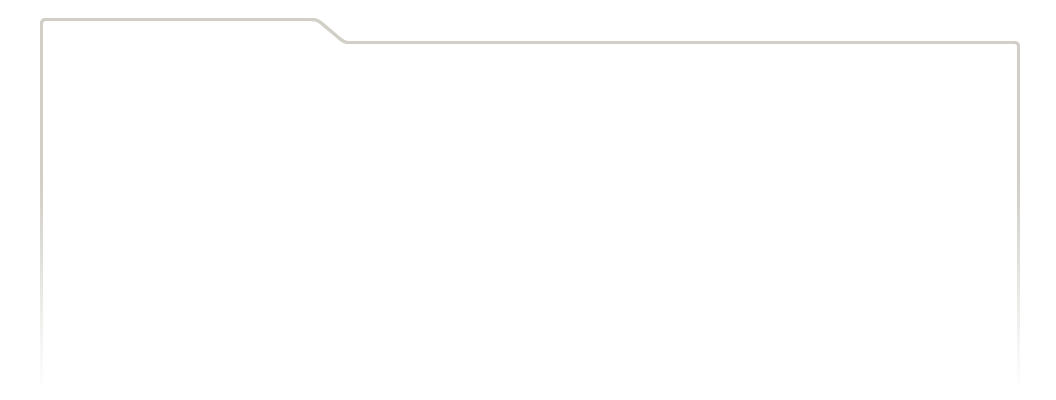
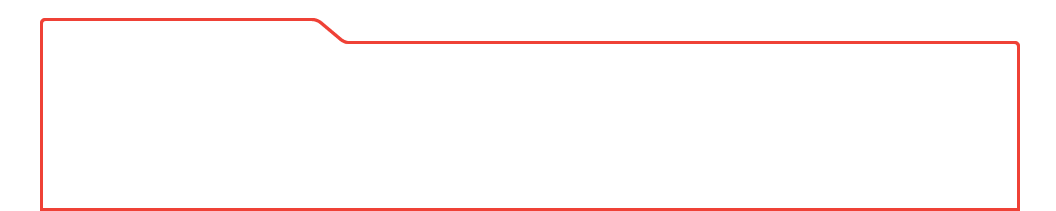
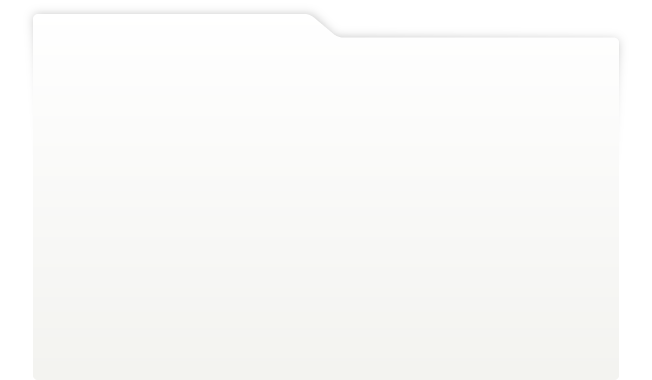
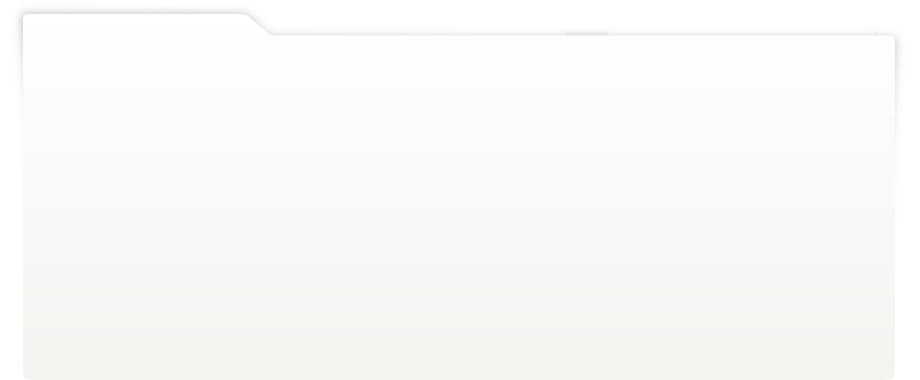
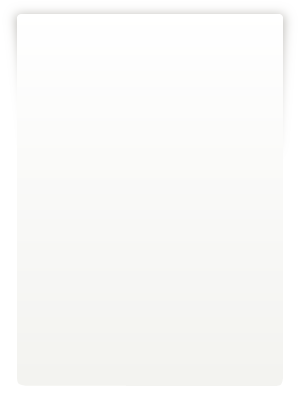
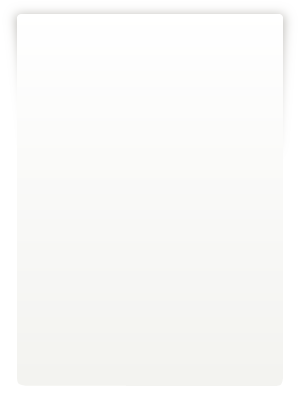
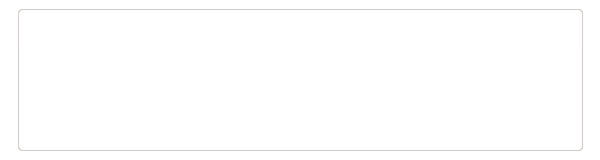
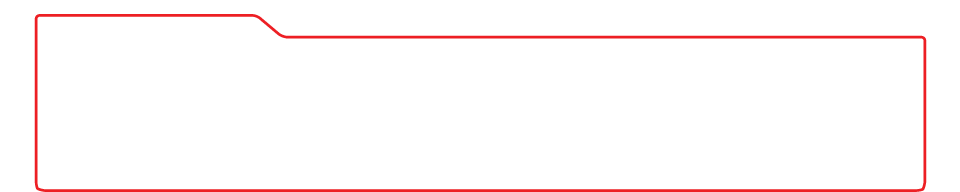
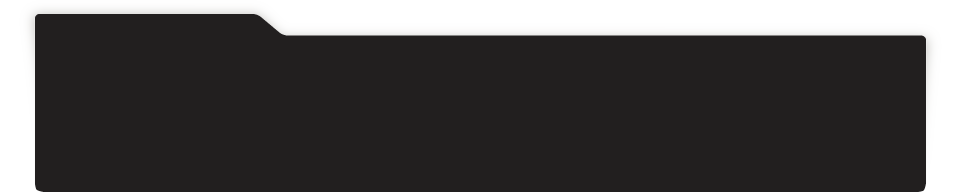
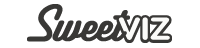
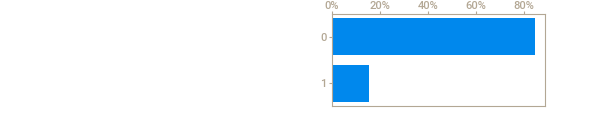
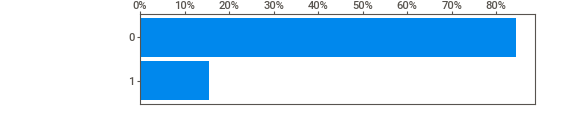
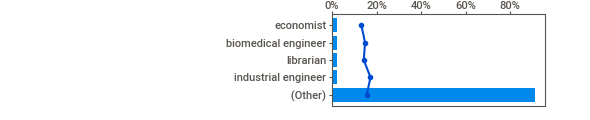
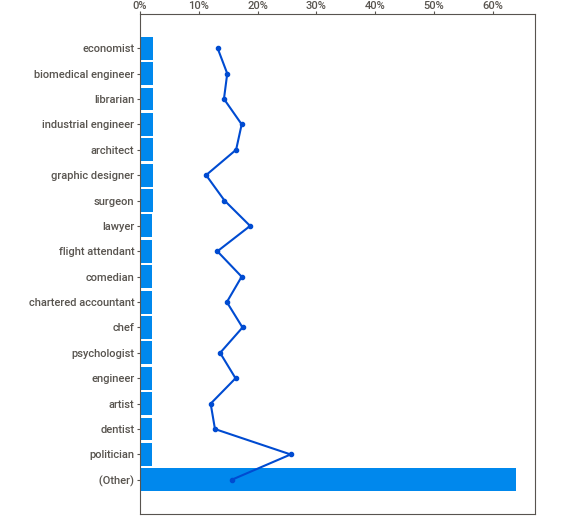
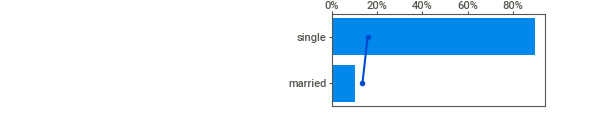
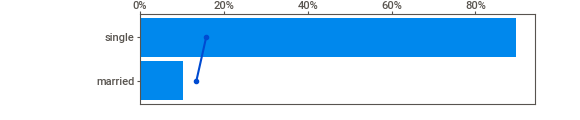
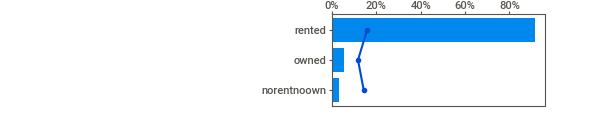
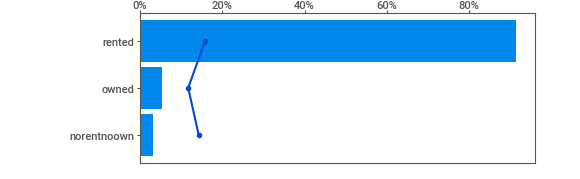
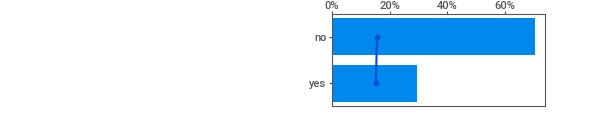
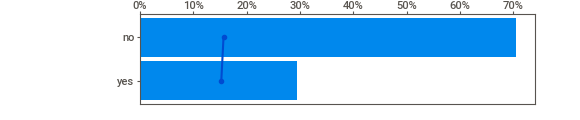
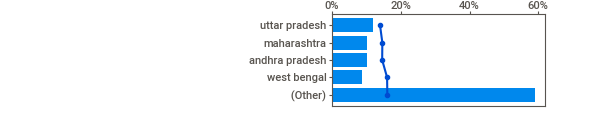
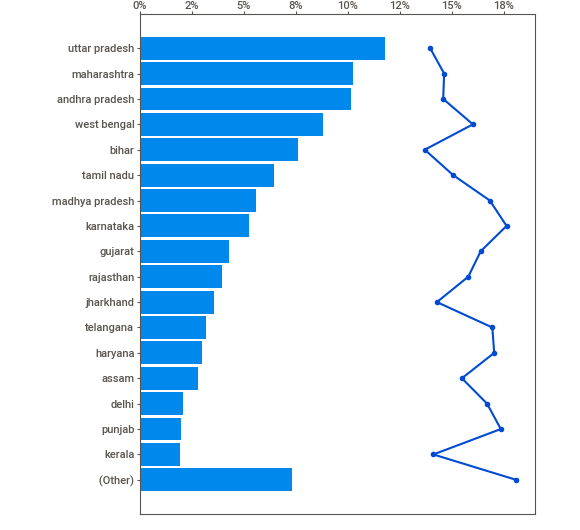
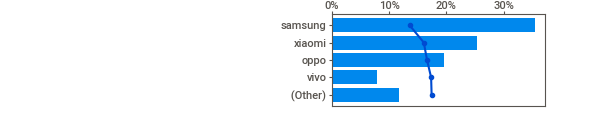
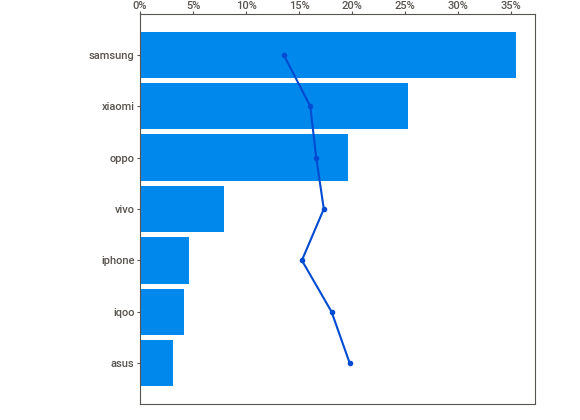
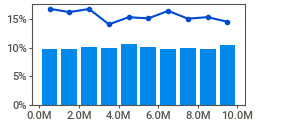
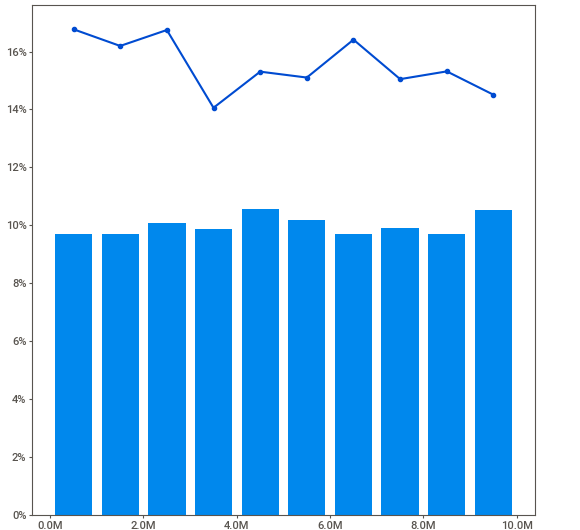
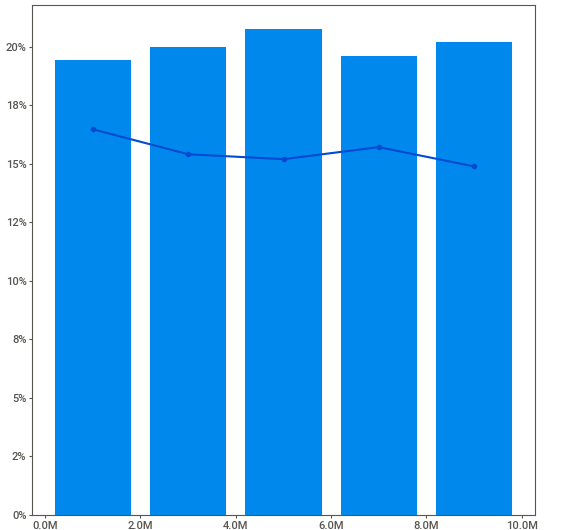
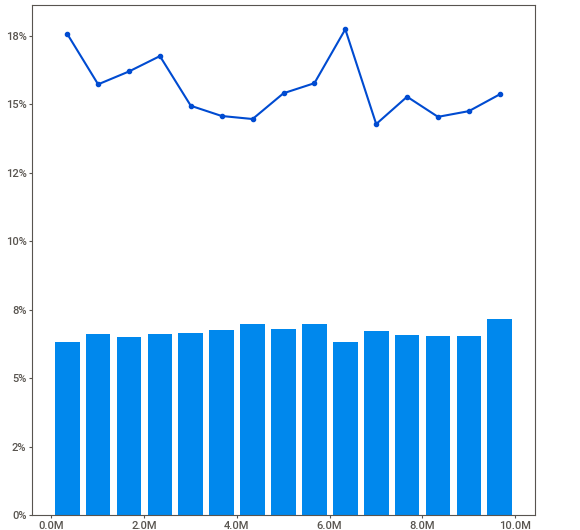
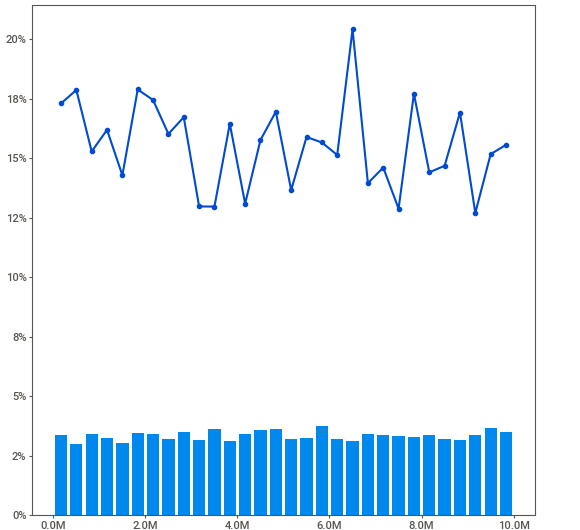
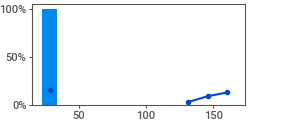
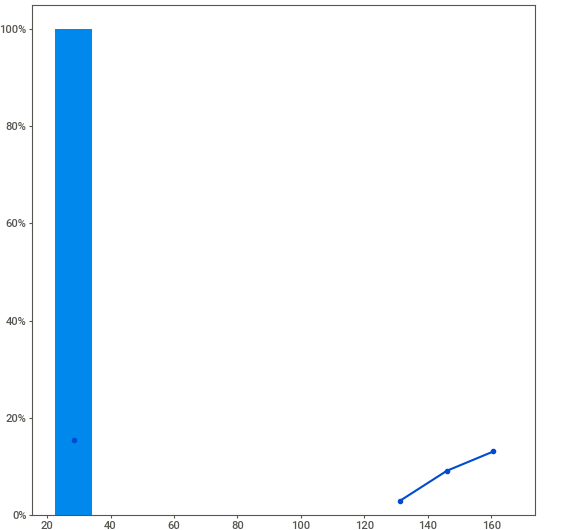
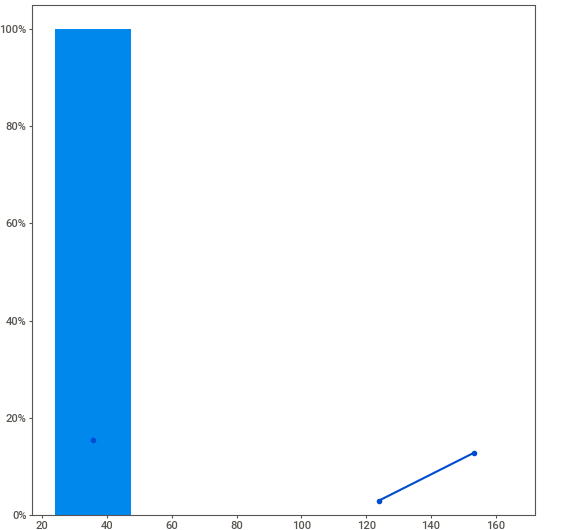
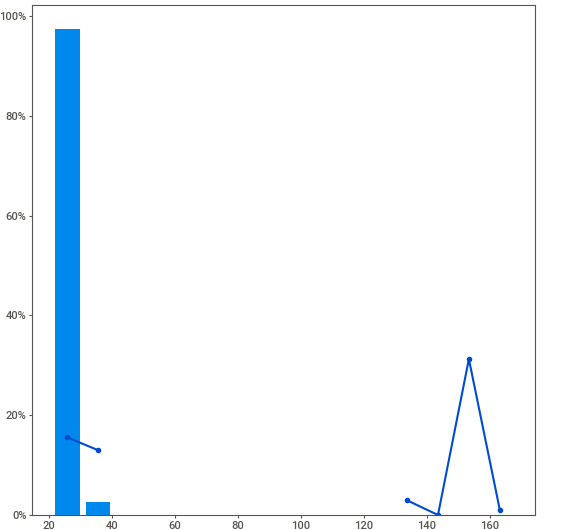
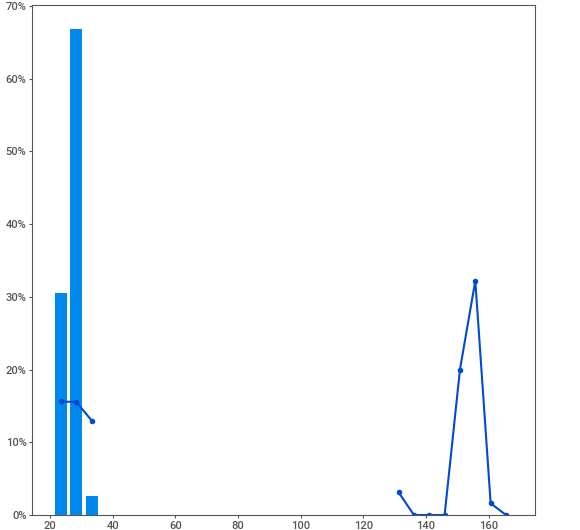
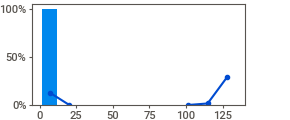
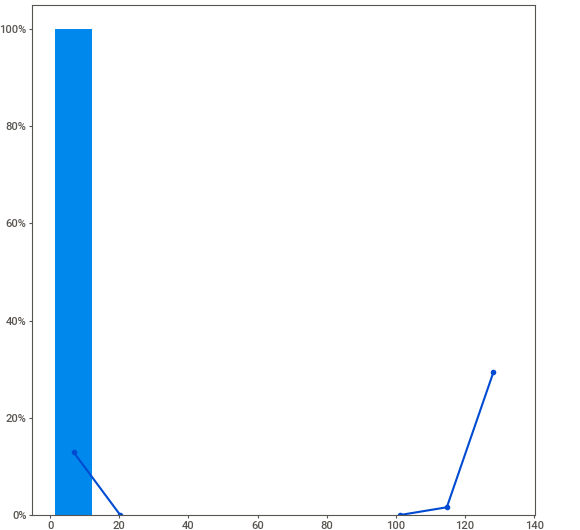
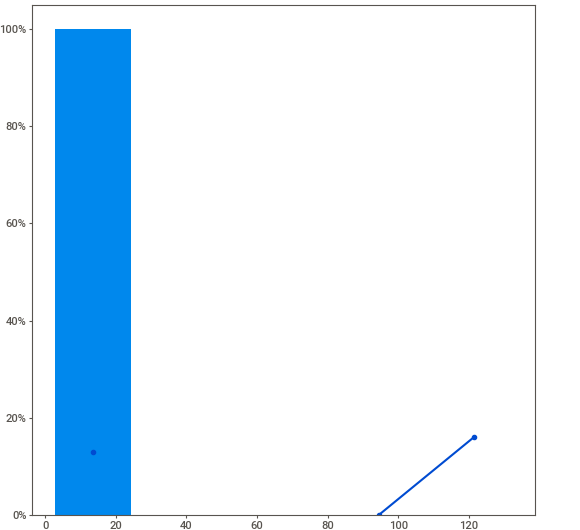
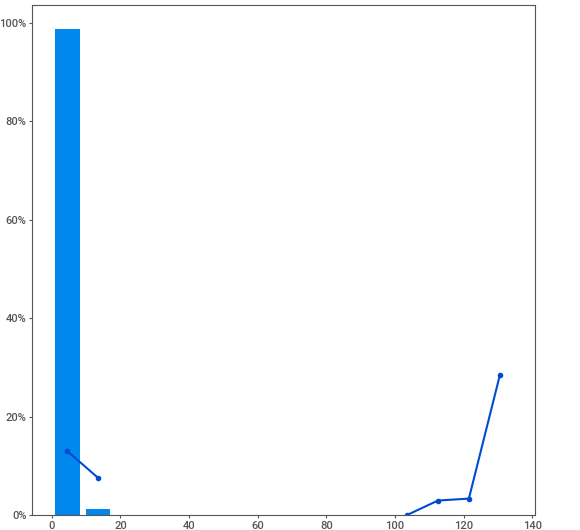
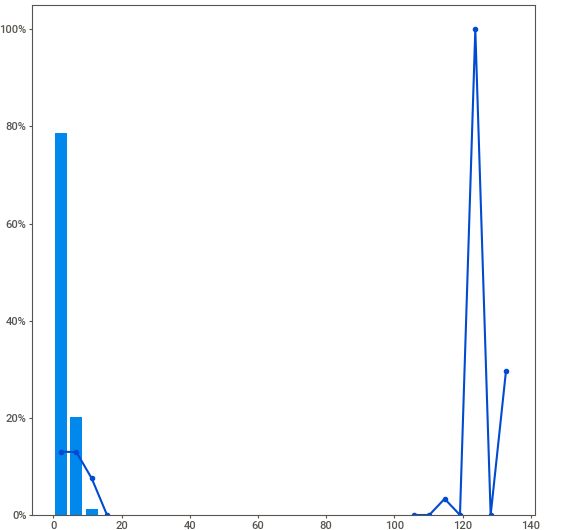
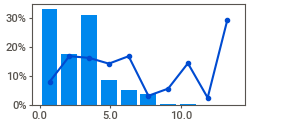
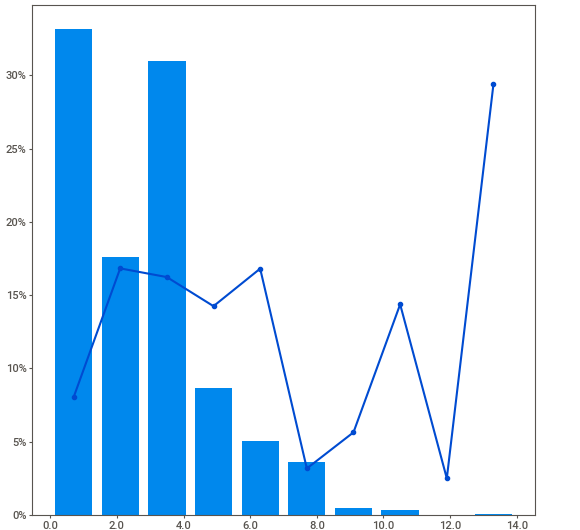
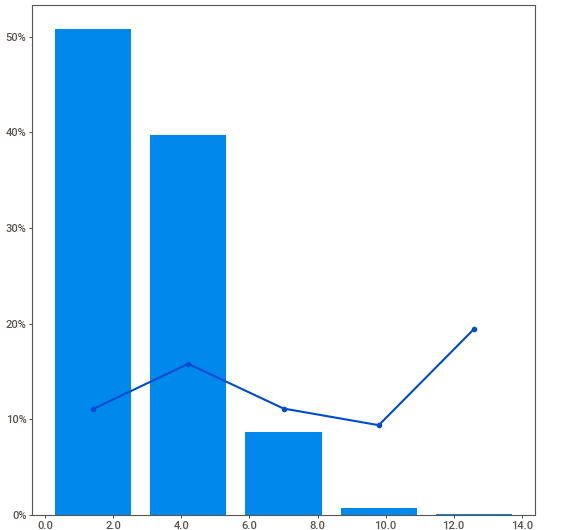
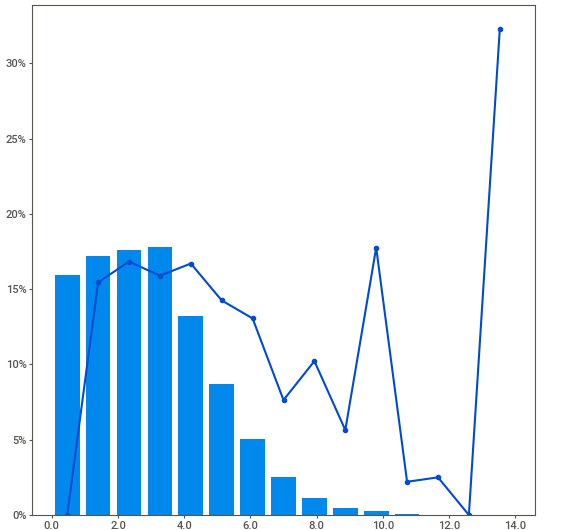
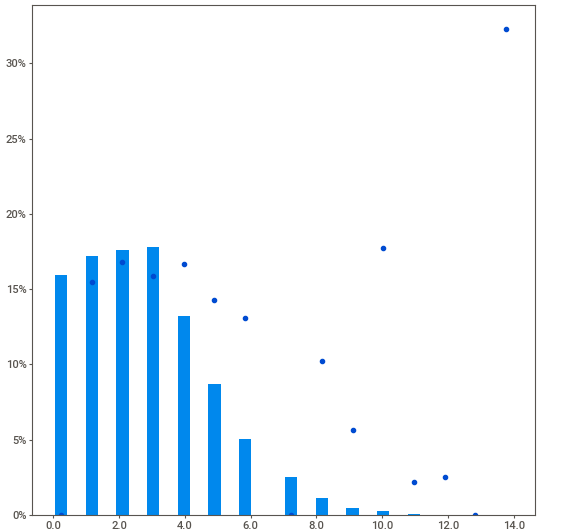
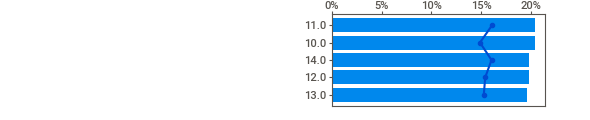
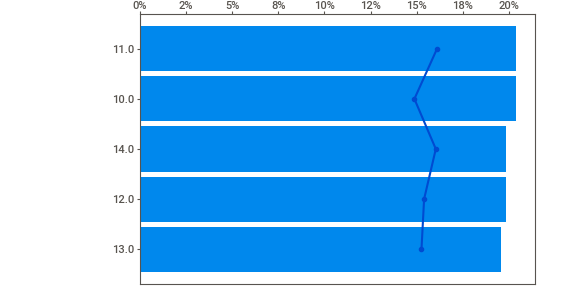
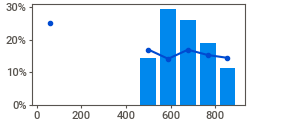
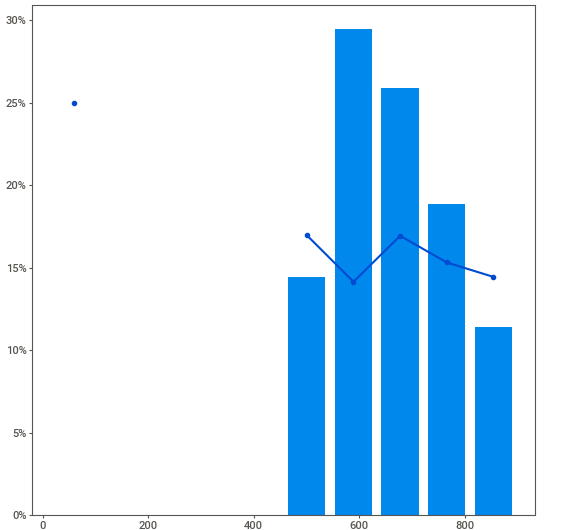
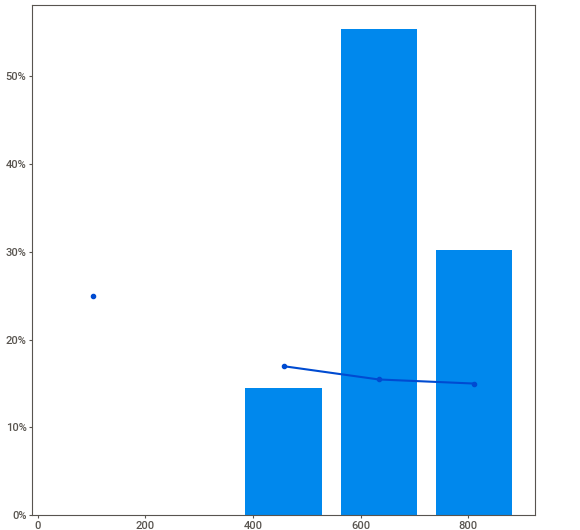
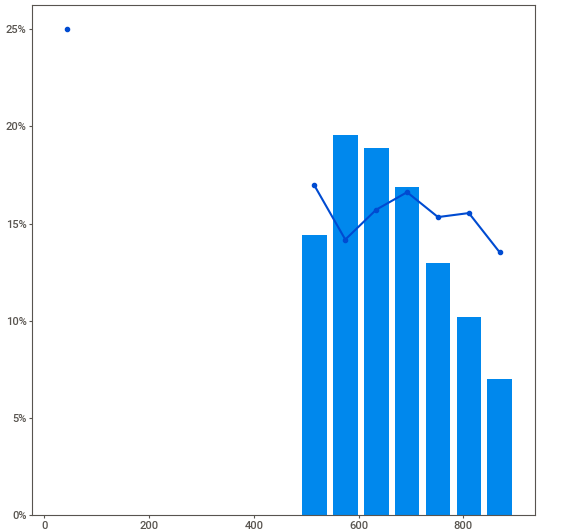
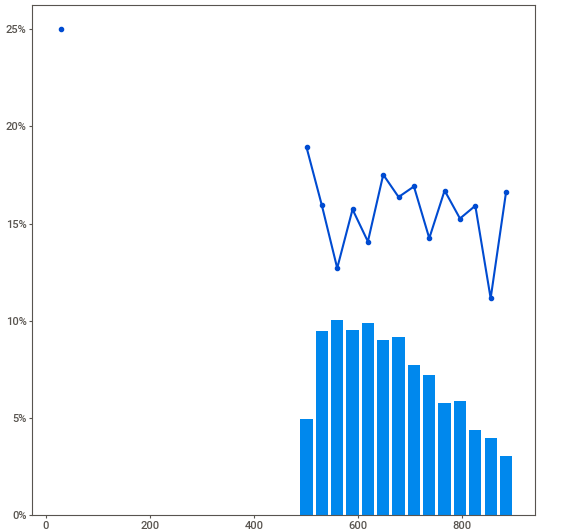
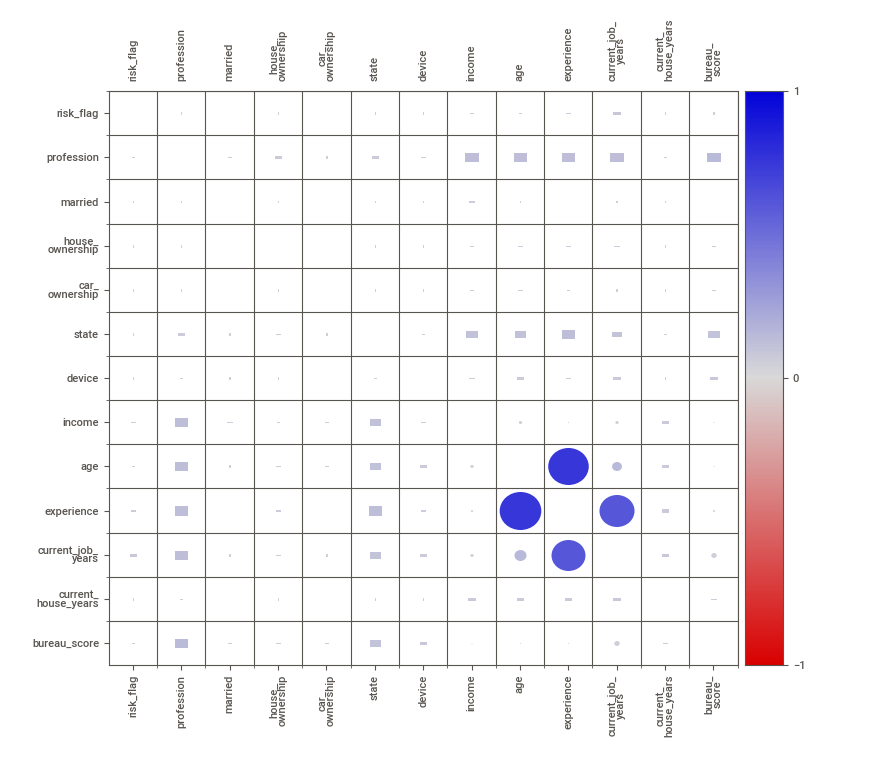
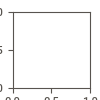

In [69]:
sweet_report.show_notebook()

In [70]:
x_train0 = t1_train[str_col_name_list+num_col_name_list]
y_train = t1_train['risk_flag']
x_test0 = t1_test[str_col_name_list+num_col_name_list]
y_test = t1_test['risk_flag']

In [72]:
x_train0.head()

,profession,married,house_ownership,car_ownership,city,state,device,income,age,experience,current_job_years,current_house_years,bureau_score
0,financial analyst,single,rented,no,fatehpur,uttar pradesh,samsung,7175181,27.00000,3.00000,3.00000,10.00000,850.00000
1,chef,single,rented,no,ozhukarai,puducherry,iqoo,7601827,30.00000,5.00000,5.00000,12.00000,690.00000
2,scientist,single,rented,no,jamalpur,bihar,vivo,9483434,26.00000,2.00000,2.00000,14.00000,662.00000
3,design engineer,single,rented,no,bhopal,madhya pradesh,xiaomi,3211177,30.00000,3.00000,3.00000,10.00000,624.00000
4,technical writer,married,owned,yes,ambarnath,maharashtra,samsung,8211851,25.00000,2.00000,2.00000,10.00000,577.00000


## Step 4: dealing with categories and completing features

We will take the approach of **Label encoding** string Variables -- this is a baseline categorical approach. It means nothing: there is no real ordering here, but it often works in conjunction with tree-based models.

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


In [74]:
enc = OrdinalEncoder(dtype=int)

x_train_str= pd.DataFrame(enc.fit_transform(x_train0[str_col_name_list]), columns=str_col_name_list)
x_test_str = pd.DataFrame(enc.transform(x_test0[str_col_name_list]), columns=str_col_name_list)

In [75]:
x_train_str.head()

,profession,married,house_ownership,car_ownership,city,state,device
0,23,1,2,0,94,25,4
1,8,1,2,0,219,18,2
2,41,1,2,0,131,2,5
3,17,1,2,0,52,13,6
4,47,0,1,1,14,14,4


In [76]:
x_train_str.shape

(187600, 7)

In [77]:
x_train_str.dtypes

profession         int64
married            int64
house_ownership    int64
car_ownership      int64
city               int64
state              int64
device             int64
dtype: object

In [78]:
enc.categories_

[array(['air traffic controller', 'analyst', 'architect', 'army officer',
        'artist', 'aviator', 'biomedical engineer', 'chartered accountant',
        'chef', 'chemical engineer', 'civil engineer', 'civil servant',
        'comedian', 'computer hardware engineer', 'computer operator',
        'consultant', 'dentist', 'design engineer', 'designer', 'drafter',
        'economist', 'engineer', 'fashion designer', 'financial analyst',
        'firefighter', 'flight attendant', 'geologist', 'graphic designer',
        'hotel manager', 'industrial engineer', 'lawyer', 'librarian',
        'magistrate', 'mechanical engineer', 'microbiologist', 'official',
        'petroleum engineer', 'physician', 'police officer', 'politician',
        'psychologist', 'scientist', 'secretary', 'software developer',
        'statistician', 'surgeon', 'surveyor', 'technical writer',
        'technician', 'technology specialist', 'web designer'],
       dtype=object),
 array(['married', 'single'], dtype=

### Concatenating Numeric and categorical


In [79]:
df_all_train1 = pd.concat([x_train_str,x_train0[num_col_name_list]],axis=1)
df_all_test1 = pd.concat([x_test_str,x_test0[num_col_name_list]],axis=1)

In [80]:
df_all_train1.shape

(187600, 13)

In [81]:
df_all_train1.head()

,profession,married,house_ownership,car_ownership,city,state,device,income,age,experience,current_job_years,current_house_years,bureau_score
0,23,1,2,0,94,25,4,7175181,27.00000,3.00000,3.00000,10.00000,850.00000
1,8,1,2,0,219,18,2,7601827,30.00000,5.00000,5.00000,12.00000,690.00000
2,41,1,2,0,131,2,5,9483434,26.00000,2.00000,2.00000,14.00000,662.00000
3,17,1,2,0,52,13,6,3211177,30.00000,3.00000,3.00000,10.00000,624.00000
4,47,0,1,1,14,14,4,8211851,25.00000,2.00000,2.00000,10.00000,577.00000


In [82]:
sel_cols = str_col_name_list + num_col_name_list

In [ ]:
##back to presentation

In [83]:
y_train.unique()

array([0, 1])

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.transform(y_test)

In [85]:
np.unique(y_train1)

array([0, 1])

In [86]:
y_train1.shape

(187600,)

## Step 5: Building the Model

We shall use xgboost to illustrate...

In [87]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

In [88]:
class_weights = [0.1,0.9]



xgb = XGBClassifier(n_estimators=300, max_depth=5, subsample=0.2, class_weights = class_weights, scale_pos_weight=6,
                    colsample_bytree= 0.3)
xgb.fit(df_all_train1,y_train1)


XGBClassifier(class_weights=[0.1, 0.9], colsample_bytree=0.3, max_depth=5,
              n_estimators=300, scale_pos_weight=6, subsample=0.2)

In [89]:
##back to presentation

## Step 6: Measure

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

In [98]:
predictions_test = xgb.predict(df_all_test1)
actuals_test = y_test1

In [109]:
probabilities_test = xgb.predict_proba(df_all_test1)[:,1]

In [101]:
cfmat = confusion_matrix(actuals_test, predictions_test)
cfmat

array([[57144, 20962],
       [ 2309, 11985]])

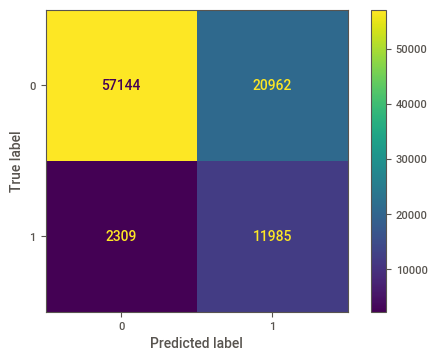

In [102]:
cmd = ConfusionMatrixDisplay(cfmat)
cmd.plot(values_format='')

In [105]:
crep = classification_report(actuals_test, predictions_test)
print(crep)

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     78106
           1       0.36      0.84      0.51     14294

    accuracy                           0.75     92400
   macro avg       0.66      0.79      0.67     92400
weighted avg       0.87      0.75      0.78     92400



In [110]:
fpr, tpr, thresholds = roc_curve(actuals_test, probabilities_test)
auc_metric = auc(fpr, tpr)
auc_metric

0.8634663668687506

Text(0, 0.5, 'tpr')

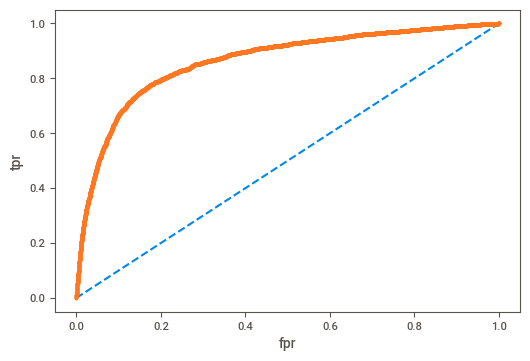

In [112]:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [113]:
auc_pr = average_precision_score(actuals_test, probabilities_test)
auc_pr

0.5824589494305816

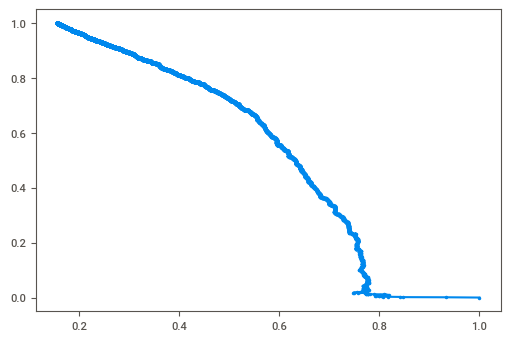

In [114]:
precision, recall, thresholds = precision_recall_curve(actuals_test, probabilities_test)
plt.plot(precision, recall, marker='.')

In [115]:
def cf_mat_conv(cf_mat):
    cf_mat1 = pd.DataFrame(cf_mat)

    
    cols0 = cf_mat1.columns
    #print (cols0)
    cols1 = []
    rows1 = []
    for i in cols0:
        i1 = "pred_" + str(i)
        i2 = "actual_" + str(i)
        cols1.append(i1)
        rows1.append(i2)
    #print (rows1)
    cf_mat1.columns = cols1
    cf_mat1["vals"] = rows1
    return cf_mat1

In [116]:
def get_metrics1(model,test_set,actual1,fg):
    pred=model.predict(test_set)
    pred1=model.predict_proba(test_set)[:,1]
    
    ac1 = accuracy_score(actual1, pred)
    cf_mat1 = confusion_matrix(actual1, pred, labels=None, sample_weight=None)
    cf_mat_orig = cf_mat1.copy()

    
    #print (b_test_b.shape)
    cf_mat1 = cf_mat_conv(cf_mat1)

    
    fpr, tpr, thresholds = roc_curve(actual1, pred1)
    auc_pr = average_precision_score(actual1, pred1)
    auc1 = auc(fpr, tpr)
    f1scr = f1_score(actual1, pred, average='macro')
    
    if(fg==1):
        plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
        plt.plot(fpr, tpr, marker='.')
    # show the plot
        plt.show()

        precision, recall, thresholds = precision_recall_curve(actual1, pred1)
        plt.plot(precision, recall, marker='.')
        plt.show()

        cmd = ConfusionMatrixDisplay(cf_mat_orig)
        cmd.plot(values_format='')

    return ac1,cf_mat1,auc1,f1scr,auc_pr


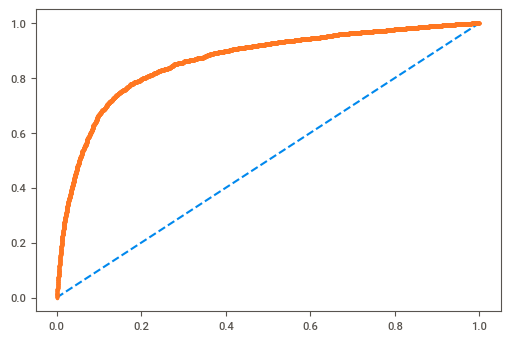

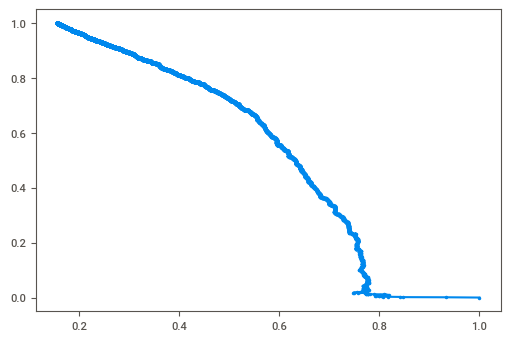

(0.7481493506493506,    pred_0  pred_1      vals
0   57144   20962  actual_0
1    2309   11985  actual_1, 0.8634663668687506, 0.6691135939894544, 0.5824589494305816)


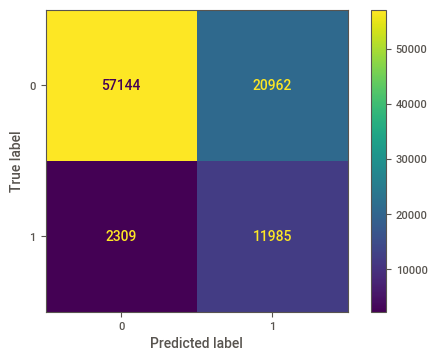

In [117]:
print (get_metrics1(xgb,df_all_test1,y_test1,1))

In [ ]:
##back to presentation

## Step 7: Explaining the Model

In [120]:
import shap

In [121]:
df_all_train1.head()

,profession,married,house_ownership,car_ownership,city,state,device,income,age,experience,current_job_years,current_house_years,bureau_score
0,23,1,2,0,94,25,4,7175181,27.00000,3.00000,3.00000,10.00000,850.00000
1,8,1,2,0,219,18,2,7601827,30.00000,5.00000,5.00000,12.00000,690.00000
2,41,1,2,0,131,2,5,9483434,26.00000,2.00000,2.00000,14.00000,662.00000
3,17,1,2,0,52,13,6,3211177,30.00000,3.00000,3.00000,10.00000,624.00000
4,47,0,1,1,14,14,4,8211851,25.00000,2.00000,2.00000,10.00000,577.00000


In [122]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(df_all_train1)

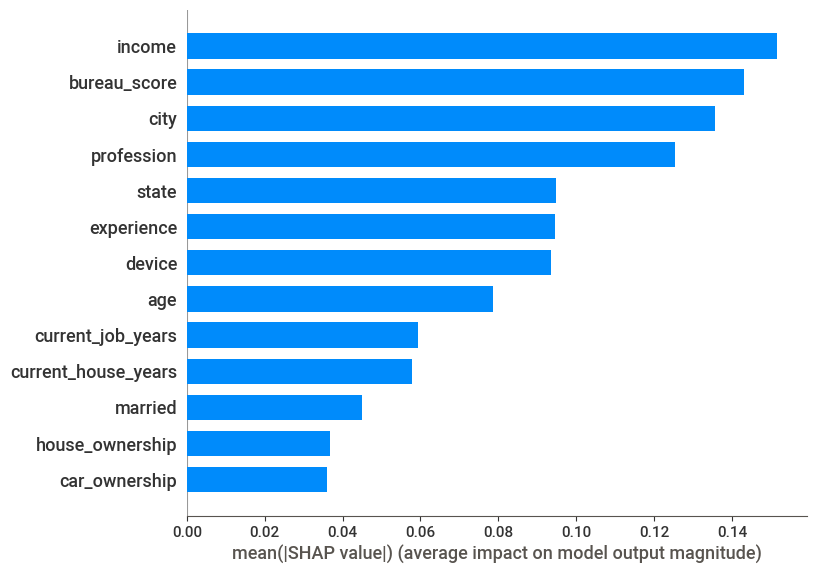

In [124]:
shap.summary_plot(shap_values, df_all_train1, plot_type="bar")

# Homework Starts From Here

## One hot encoding

In [ ]:
#OneHotEncoding the data
enc = OneHotEncoder(handle_unknown='ignore')

#use fit_transform method of onehotencoder to one hot encode categorical columns of x_train0 and x_test0

df_one_hot_tr = pd.DataFrame(_____.fit_transform(np.array(_____[str_col_name_list])).todense())
df_one_hot_te = pd.DataFrame(enc.transform(np.array(x_test0[_________])).todense())
colnames = enc.get_feature_names_out()

#assign column names of one hot dataframes to colnames
df_one_hot_tr.columns = ________
df_one_hot_te.columns = ________

In [ ]:
# take a look at the one hot coded training dataframe using .head()
df_one_hot_tr.______()

In [ ]:
# concatenate one hot encoded colmns to the numerical columns of the train and test data [num_col_name_list] along axis =1
df_all_one_hot_train1 = pd.concat([df_one_hot_tr,x_train0[______________]],axis=__)
df_all_one_hot_test1 = pd.concat([df_one_hot_te,x_test0[______________]],axis=___)

In [ ]:
#make a list of all selected columns adding list of colnames and num_col_name_list
sel_cols = list(colnames) + ___________

In [ ]:
class_weights = [0.1,0.9]


#Create model instance of XGBClassifier with n_estimators =100, max_depth =5, subsample =0.2, 
# class_weights as class_weights we created above, scale_pos_weight =6, colsample_bytree = 0.3
xgb_ohe = XGBClassifier(n_estimators=____,max_depth= ___,subsample= ____,class_weights = class_weights,scale_pos_weight=___,
                    colsample_bytree= ___,n_jobs=6)
# for the model on train data(df_all_one_hot_train1 and y_train1)
xgb_ohe.fit(________________,______)


In [ ]:
print (get_metrics1("xgb_ohe",df_all_one_hot_test1,y_test1,1))

In [ ]:
df1_tr_ohe = pd.DataFrame(df_all_one_hot_train1)
df1_tr_ohe.columns =sel_cols

#Lets do some XAI using SHAP input the model xgb_ohe in shap.treeexplainer
explainer_ohe = shap.TreeExplainer(_____)
#input the training dataframe df1_tr_ohe 
shap_values_ohe = explainer_ohe.shap_values(_______)

In [ ]:
#Lets make a summary plot of shap_values_ohe, df1_tr_ohe with a "bar" plot
shap.summary_plot(____________, _________, plot_type="___")

## Median Impute of Missing Values

In [ ]:
#### median impute of missing values

In [ ]:
#create simpleimputer object for replacing nan values with median [missing_values=np.nan, strategy='median']
imp_median = SimpleImputer(missing_values=______, strategy='_____')
#we can impute numerical columns by this Simple Imputer. So pass numerical columns of x_train0[num_col_name_list]
imp_median.fit(x_train0[____________])
#transform both test and train data using imp_mean 
x_train_num = pd.DataFrame(imp_median.transform(x_train0[_________]))
x_test_num = pd.DataFrame(imp_median.transform(x_test0[____________]))

x_train_num.columns = num_col_name_list
x_test_num.columns = num_col_name_list

In [ ]:
#concatenate the string columns and the numerical columns of Train and test data along axis =1
df_all_imp_train1 = pd.concat([x_train_str,_______],axis=___)
df_all_imp_test1 = pd.concat([x_test_str,________],axis=1)

In [ ]:
class_weights = [0.1,0.9]

#Create model instance of XGBClassifier with n_estimators =300, max_depth =5, subsample =0.2, 
# class_weights as class_weights we created above, scale_pos_weight =6, colsample_bytree = 0.3

xgb_imp = XGBClassifier(n_estimators=300,max_depth= 5,subsample= 0.2,class_weights = class_weights,scale_pos_weight=6,
                    colsample_bytree= 0.3)
xgb_imp.fit(df_all_imp_train1,y_train1)

In [ ]:
print (get_metrics1("xgb_imp",df_all_imp_test1,y_test1,1))

## Putting it all together

In [ ]:
#Making a dataframe with the metrics : accuracy, auc, f1, auc_pr for the different models we created using different data sets

#make a list of datasets created : df_all_test1,df_all_one_hot_test1,df_all_imp_test1
df_datasets = [________,________,___________]

# loop over the models we created respectively in the list above: "xgb","xgb_ohe","xgb_imp"

for num,i in enumerate(["___","_______","___________"]):
    print (num)
    ac1,cf_mat1,auc1,f1scr,auc_pr = get_metrics1(i,df_datasets[num],y_test1,0)
    
    # make a data frame of selected metrics (ac1,auc1,f1scr,auc_pr)
    df_met = pd.DataFrame([(__,__,___,____)])
    #name the columns of data frame
    df_met.columns = ["accuracy","auc","f1","auc_pr"]
    df_met["model"] = i
    
    if(num==0):  
        df_met_all = df_met
    else:
        #concatenate the data frames to create one data frame
        df_met_all = pd.concat([df_met,df_met_all],axis=0)

In [ ]:
#visualise the metrics data frame using .head()
df_met_all._____()

In [ ]:
##back to presentation